In [107]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

In [45]:
GEP1 = pd.read_csv('../data/GEP/Consumption_15min.csv', index_col=0, header=0, names=['value'])
ERCOT = pd.read_csv('../data/ERCOT/ercot_data.csv', index_col=0, header=0, names=['value','T'])
GEFCOM = pd.read_csv('../data/GEFCom2014/gefcom2014.csv', index_col=0, header=0, names=['value'])

In [81]:
GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().iloc[:,0]

dayofweek
0    12.330962
1    12.394557
2    12.787164
3    12.400101
4    11.992488
5     8.170304
6     8.265877
Name: value, dtype: float64

In [83]:
GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().iloc[:]

,value
dayofweek,
0,12.330962
1,12.394557
2,12.787164
3,12.400101
4,11.992488
5,8.170304
6,8.265877


In [382]:
GEP1['week'] = GEP1.index.isocalendar().week

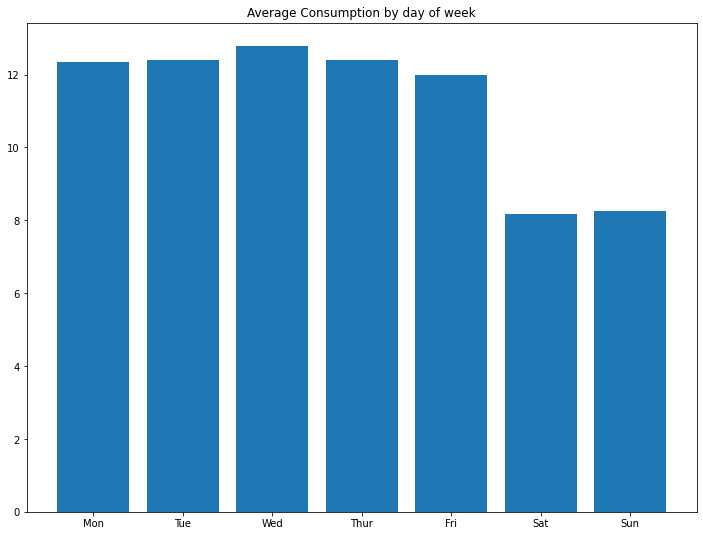

In [383]:
GEP1.index = pd.to_datetime(GEP1.index)
days = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
GEP1['new'] = GEP1.groupby(GEP1.index.dayofweek).value.transform('mean')
GEP1['dayofweek'] = GEP1.index.dayofweek
ax.bar(GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().index, GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().iloc[:,0])
ax.set_xticks(GEP1[['dayofweek', 'value']].groupby('dayofweek').mean().index)
ax.set_xticklabels(days)
plt.title('Average Consumption by day of week')
plt.show()

In [412]:
def plot_weeks(df):
    #list of names for xtick labels. Extra Monday for end.
    weekday_names = "Mon Tue Wed Thu Fri Sat Sun".split(' ')
    fig, ax = plt.subplots()
    years = df.index.year.unique()
    for year in years:
        for name, group in df[str(year)].groupby(df.index.isocalendar().week):
            start_day= group.index.min()
            Xs = group.index - start_day
            #print(Xs.astype('timedelta64[h]'))
            #if (len(Xs) > 672):
            #    print(group)
            Xs = pd.Series(Xs.astype('timedelta64[h]'))
            Ys = group.iloc[:,0]
            fig.set_size_inches(14, 9)
            ax.scatter(Xs, Ys)

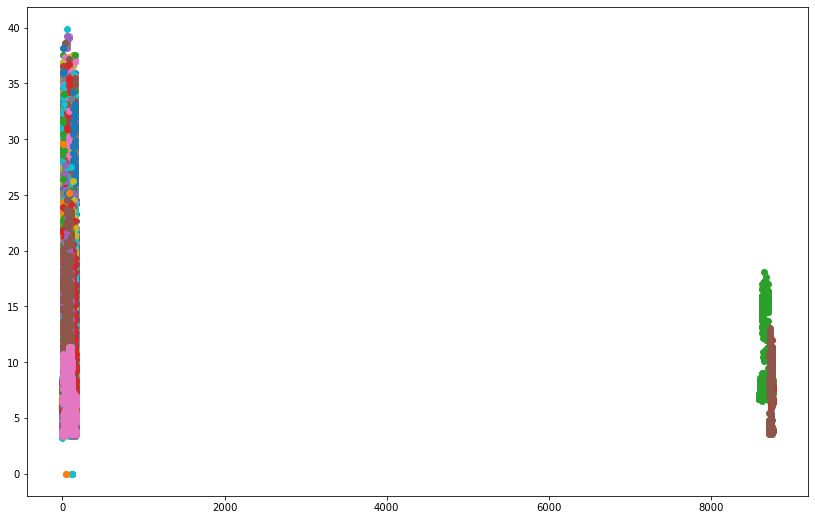

In [413]:
GEP1 = GEP1.sort_index()
plot_weeks(GEP1)

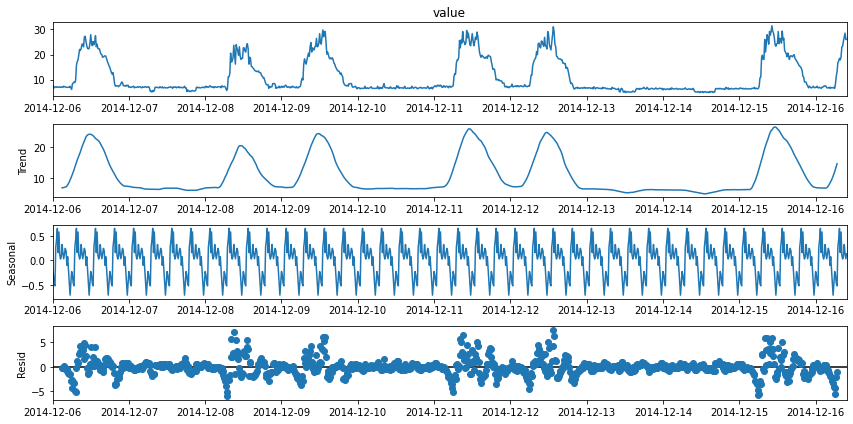

In [126]:
y = GEP1.value
decomposition = sm.tsa.seasonal_decompose(y[:1000], model='additive', period=24)
fig = decomposition.plot()
plt.show()

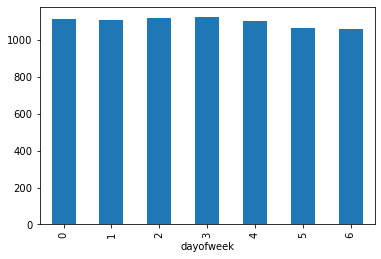

In [48]:
ERCOT.index = pd.to_datetime(ERCOT.index)
ERCOT['new'] = ERCOT.groupby(ERCOT.index.dayofweek).value.transform('mean')
ERCOT['dayofweek'] = ERCOT.index.dayofweek
ERCOT[['dayofweek', 'value']].groupby('dayofweek').mean().plot(kind='bar', legend=None)
plt.show()

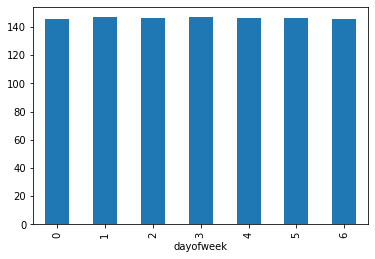

In [47]:
GEFCOM.index = pd.to_datetime(GEFCOM.index)
GEFCOM['new'] = GEFCOM.groupby(GEFCOM.index.dayofweek).value.transform('mean')
GEFCOM['dayofweek'] = GEFCOM.index.dayofweek
GEFCOM[['dayofweek', 'value']].groupby('dayofweek').mean().plot(kind='bar', legend=None)
plt.show()